In [1]:
%matplotlib inline
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image

import sys
sys.path.append("..") 
import d2lzh_pytorch as d2l


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/mylady/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/mylady/anaconda3/envs/d2l_pytorch/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils

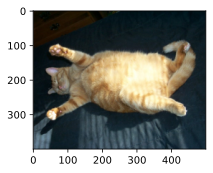

In [2]:
d2l.set_figsize()
img = Image.open('./img/cat1.jpg')


d2l.plt.imshow(img)

In [3]:
def show_images(imgs, num_rows, num_cols, scale=2):
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    for i in range(num_rows):
        for j in range(num_cols):
            axes[i][j].imshow(imgs[i * num_cols + j])
            axes[i][j].axes.get_xaxis().set_visible(False)
            axes[i][j].axes.get_yaxis().set_visible(False)
        pass
    return axes

In [4]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    show_images(Y, num_rows, num_cols, scale)

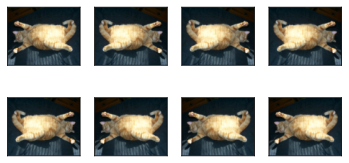

In [5]:
# 实例来实现一半概率的图像水平（左右）翻转
apply(img, torchvision.transforms.RandomHorizontalFlip())

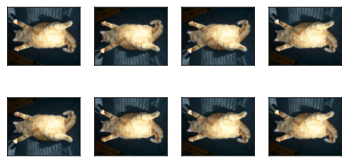

In [6]:
# 上下翻转
apply(img, torchvision.transforms.RandomVerticalFlip())

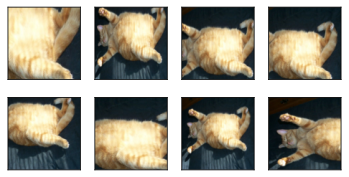

In [7]:
# 裁剪
shape_aug = torchvision.transforms.RandomResizedCrop(200, 
                                                     scale=(0.1, 1), 
                                                     ratio=(0.5, 2)
                                                    )
# 
apply(img, shape_aug)

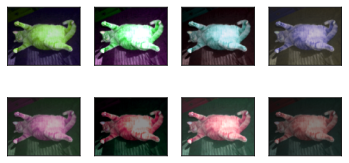

In [8]:
# 色调变换
color_aug = torchvision.transforms.ColorJitter(
    brightness=0.5,  # 亮度
    contrast=0.5,    # 对比度
    saturation=0.5,  # 饱和度
    hue=0.5          # 色调
)


apply(img, color_aug)

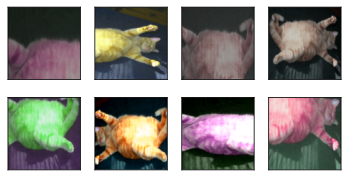

In [9]:
# 叠加使用
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(), 
    color_aug,  # 图片颜色变换
    shape_aug   # 图片颜色裁剪
])

apply(img, augs)